## Importation Librairies

.Installation

In [443]:
#pip install sqldf

In [444]:
#pip install xlrd

In [445]:
import pandas as pd
import numpy as np
import random
import datetime
import sqldf
import math
import seaborn as sns
from decimal import *
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
#from sklearn.metrics confusion_matrix
#from sklearn.metrics accuracy_score
#from sklearn.metrics classification_report
from sklearn.cluster import KMeans


## # Create a dummy pd.Dataframe

In [446]:
df = pd.read_excel('data/ONLINE_RETAILS.xlsx')

In [447]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Preprocessing

In [448]:
data = df.copy()

In [449]:
data.shape

(541909, 8)

In [450]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [451]:
data.isnull

<bound method DataFrame.isnull of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cu

In [452]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"].dt.strftime('%Y-%m-%d')) # 1* 
snapshot = data["InvoiceDate"].max() # 2* 
snapshot = snapshot + pd.Timedelta(days=1) # 3* 
print("Our snapshot date: ",snapshot)
data.head()

Our snapshot date:  2011-12-10 00:00:00


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [453]:
data['total_price'] = data["Quantity"] * data["UnitPrice"]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [454]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   total_price  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


Visualisation des données

<AxesSubplot:ylabel='None'>

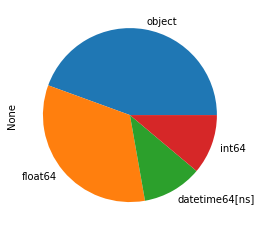

In [455]:
data.dtypes.value_counts().plot.pie()

<AxesSubplot:>

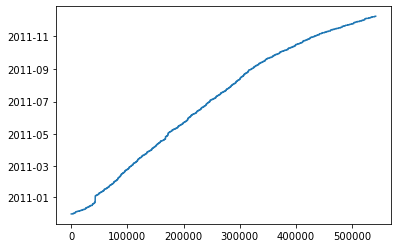

In [456]:
data['InvoiceDate'].plot()

Suppression de la colonne Total prix

In [457]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [458]:
del data['total_price']

In [459]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


## Nettoyage de données
- On constate la présence des valeurs négatives 
- Nous allons donc nous focaliser que sur les valeurs positives

In [460]:
data_c= data.copy()
data_c

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


In [461]:
Neg_value = data_c[data_c['Quantity']<0]

In [462]:
Neg_value

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09,1.25,17315.0,United Kingdom


In [463]:
data_c[(data_c['Quantity'] < 0) & (data_c['InvoiceNo'].str.contains('C'))].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom


In [464]:
data_c[(data_c['Quantity'] < 0) & (data_c['InvoiceNo'].str.contains('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09,1.25,17315.0,United Kingdom


In [465]:
pos_value = data_c[data_c['Quantity'] > 0 ]
pos_value

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


In [466]:
#data_c['Quantity'] = data_c['Quantity'].abs()
data_c = pos_value.copy()

In [467]:
len(data_c)

531285

In [468]:
data_c.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [469]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


Suppression des données dupliquées

In [470]:
data_c.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


In [471]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [472]:
data_c.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [473]:
data_c = data_c.dropna()

In [474]:
data_c.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [475]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [476]:
data_c.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [477]:
data_f = data_c.copy()

In [478]:
data_f.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


## Création d'une colonne dépense =  Prix * Quantité ==> quantité par dépenses
- Calculer la sum des quantités groupées par pays 
- calculer la moyenne pour avoir le nombre moyen par pays 

In [479]:
data_f['Spent'] = data_f.Quantity * data_f.UnitPrice
data_f.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


## MODIFICATION DU FORMAT DATE
On va utiliser InvoiceDate 
 - 1* On exclus l'heure et les minutes pour faciliter notre analyse
 - 2* La dernière date devient notre date max
 - 3* On ajoute 1 jour à la date max 

In [480]:
#data_f["InvoiceDate"] = pd.to_datetime(data_f["InvoiceDate"].dt.strftime('%Y-%m-%d')) # 1* 
#snapshot = data_f["InvoiceDate"].max() # 2* 
#snapshot = snapshot + pd.Timedelta(days=1) # 3* 
#print("Our snapshot date: ",snapshot)
#data_f.head()

Récupération de la variable Année, Mois et Jour sous forme de Colonne

In [481]:
data_f['Year'] = data_f['InvoiceDate'].dt.year
data_f['Month'] = data_f['InvoiceDate'].dt.month
data_f['Day'] = data_f['InvoiceDate'].dt.day

In [482]:
data_f.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##                                       Partie I : QUESTION

---------------------------------------------------------------------------------------------------------------------------

## Question 1 : VOLUME

In [483]:
data_f.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1


Process : 

Données utilisées 
- Country ==> Pays où l’achat a été réalisé
- Quantity ===> Quantité de produits 
- CustomerID ==> Identifiant de l’acheteur

In [484]:
# Volume ici correspond au nombre de produits qu'un client achète
Volume= data_f.groupby(['CustomerID']).agg({'Quantity':'sum'}).reset_index()
Volume.head()

,CustomerID,Quantity
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


In [485]:
# En général un client achète :
Nb_quantite = Volume.Quantity.mean().__round__(2)
Nb_quantite
print("En général un client achète " + str(Volume.Quantity.mean().__round__(2)) + " Produits")

En général un client achète 1194.21 Produits


Distribution associée

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

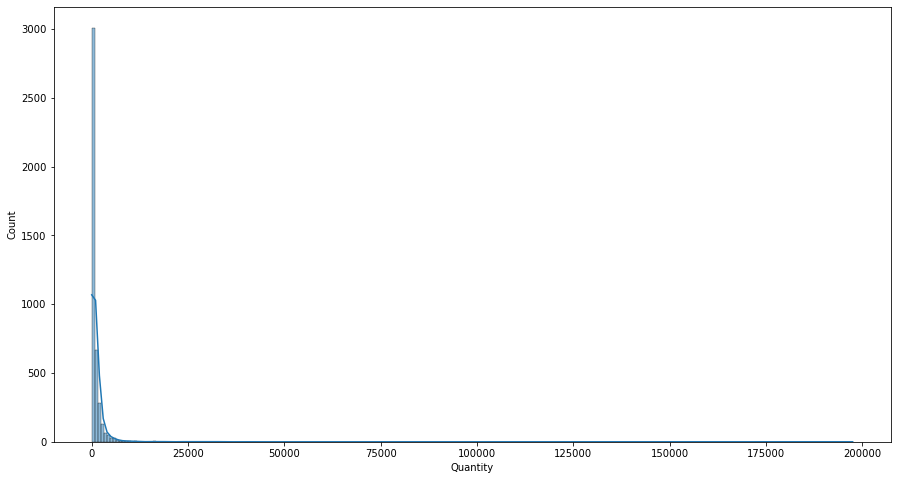

In [486]:
plt.figure(figsize=(15,8))
sns.histplot(data=Volume, x="Quantity", kde=True, bins=250)


Le volume moyen et median par pays

In [487]:
Moyenne= data_f.groupby(['Country']).agg({'Quantity':'mean'}).reset_index()

In [488]:
Moyenne = Moyenne.rename(columns={'Quantity' :'Quantity Number by Country'})

In [489]:
Moyenne.head()

,Country,Quantity Number by Country
0,Australia,71.062447
1,Austria,12.263819
2,Bahrain,15.294118
3,Belgium,11.441162
4,Brazil,11.125000


In [490]:
Mediane= data_f.groupby(['Country']).agg({'Quantity':'median'}).reset_index()

In [491]:
Mediane = Mediane.rename(columns={'Quantity' :'Quantity Numb/Country'})

In [492]:
Mediane.head()

,Country,Quantity Numb/Country
0,Australia,32
1,Austria,10
2,Bahrain,6
3,Belgium,10
4,Brazil,10


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Question  2: MONTANT

Process : 

Données utilisées 
- Quantity : Quantité de produits achetés
- UnitPrice : Prix unitaire du produit
- CustomerID ==> Identifiant de l’acheteur

In [493]:
data_f.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1


Montant correspond au montant dépensé par un client généralement

In [494]:
Montant = data_f.groupby(['CustomerID']).agg({'StockCode':'count'}).reset_index()

In [495]:
Montant

,CustomerID,StockCode
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [496]:
Montant_depénsé = Montant.mean()

In [497]:
Montant_depénsé

CustomerID    15299.936852
StockCode        91.708689
dtype: float64

In [498]:
Montant_depénsé.StockCode.round(2)
print("En général un client dépense un montant de " + str(Montant_depénsé.StockCode.__round__(2)))

En général un client dépense un montant de 91.71


 Affichage la distribution associée

<AxesSubplot:xlabel='StockCode', ylabel='Count'>

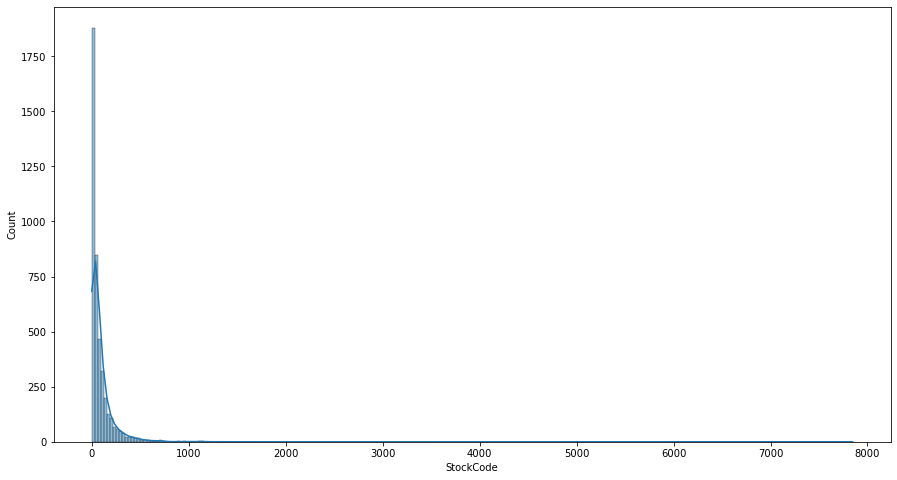

In [499]:
plt.figure(figsize=(15,8))
sns.histplot(data=Montant, x="StockCode", kde=True, bins=250)

In [500]:
Montant_1 = data_f.groupby(['StockCode']).nunique()['CustomerID']

In [501]:
Montant_1.head().reset_index()

,StockCode,CustomerID
0,10002,40
1,10080,19
2,10120,25
3,10125,49
4,10133,101


In [502]:
(data_f[data_f['StockCode']==10002]).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01,0.85,12583.0,France,40.80,2010,12,1
142,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01,0.85,16098.0,United Kingdom,10.20,2010,12,1
5466,536863,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-03,0.85,17967.0,United Kingdom,0.85,2010,12,3
7598,537047,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-05,0.85,13069.0,United Kingdom,0.85,2010,12,5
10168,537227,10002,INFLATABLE POLITICAL GLOBE,24,2010-12-06,0.85,17677.0,United Kingdom,20.40,2010,12,6


Le Montant moyen et median par pays
- Travail à faire :
    - Calculer le montant moyen et le montant médian d’un panier client, par pays

In [503]:
Montant_Moyen = data_f.groupby(['Country']).agg({'Spent':'mean'}).rename(columns={'Spent' :'Montant_Moyen'}).reset_index()
Montant_Moyen.head().round(2)

,Country,Montant_Moyen
0,Australia,116.90
1,Austria,25.62
2,Bahrain,32.26
3,Belgium,20.28
4,Brazil,35.74


In [504]:
Montant_Median = data_f.groupby(['Country']).agg({'Spent':'median'}).rename(columns={'Spent' :'Montant_Médian'}).reset_index()
Montant_Median.head().round(2)

,Country,Montant_Médian
0,Australia,66.00
1,Austria,17.17
2,Bahrain,25.50
3,Belgium,16.60
4,Brazil,19.65


In [505]:
Montant_Moyen['Montant_Médian'] = Montant_Median.Montant_Médian
Montant_Moyen.head()

,Country,Montant_Moyen,Montant_Médian
0,Australia,116.895620,66.00
1,Austria,25.624824,17.17
2,Bahrain,32.258824,25.50
3,Belgium,20.283772,16.60
4,Brazil,35.737500,19.65


-------------------------------------------------------------------------------------------------------------------------------------------------

## Question 3 : Volume: Top-5 produits


## Premier trimestre 2011
- StockCode : identifiant de produit
- Quantity : quantité de produits achetés
- InvoiceDate : date de l’achat

In [506]:
data_f.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1


In [507]:
data_top5 = data_f[ (data_f['Year']==2011) & (data_f['Month'].between(1,3))]

les top-5 produits les plus vendus 
-     Durant le premier trimestre 2011

In [508]:
Top_5_Product_1 = data_top5.groupby(['StockCode','Month']).agg({'Quantity':'sum'}).reset_index()

In [509]:
Top_5_Product_1.sort_values(['Quantity'], ascending=False).head(5)

,StockCode,Month,Quantity
4426,23166,1,74215
6182,85123A,1,5467
6168,85099B,3,4924
2078,22053,2,3986
4770,84077,3,3888


les top-5 produits les plus vendus 
-     Pendant le second trimestre 2011

In [510]:
Mask1 = (data_f['Year']==2011)
Mask1 = data_f[Mask1]

In [511]:
Mask1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313.0,United Kingdom,19.5,2011,1,4
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313.0,United Kingdom,10.5,2011,1,4
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313.0,United Kingdom,12.5,2011,1,4


In [512]:
Mask2 = (Mask1['Month'].between(4,6))

In [513]:
data_top5_2 = Mask1[Mask2]
data_top5_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01,1.65,18161.0,United Kingdom,16.50,2011,4,1
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01,1.65,18161.0,United Kingdom,19.80,2011,4,1
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01,0.85,18161.0,United Kingdom,10.20,2011,4,1
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01,9.95,18161.0,United Kingdom,19.90,2011,4,1
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01,2.55,18161.0,United Kingdom,15.30,2011,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
245898,558637,22032,BOTANICAL LILY GREETING CARD,12,2011-06-30,0.42,17891.0,United Kingdom,5.04,2011,6,30
245899,558637,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-06-30,0.42,17891.0,United Kingdom,5.04,2011,6,30
245900,558637,22033,BOTANICAL ROSE GREETING CARD,12,2011-06-30,0.42,17891.0,United Kingdom,5.04,2011,6,30
245901,558637,22029,SPACEBOY BIRTHDAY CARD,12,2011-06-30,0.42,17891.0,United Kingdom,5.04,2011,6,30


In [514]:
data_top5_2 = data_f[ (data_f['Year']==2011) & (data_f['Month'].between(4,6))].head()
data_top5_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01,1.65,18161.0,United Kingdom,16.5,2011,4,1
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01,1.65,18161.0,United Kingdom,19.8,2011,4,1
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01,0.85,18161.0,United Kingdom,10.2,2011,4,1
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01,9.95,18161.0,United Kingdom,19.9,2011,4,1
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01,2.55,18161.0,United Kingdom,15.3,2011,4,1


In [515]:
Top_5_Product_2 = data_top5_2.groupby(['StockCode','Month']).agg({'Quantity':'sum'}).reset_index()

In [516]:
Top_5_Product_2.sort_values(['Quantity'], ascending=False).head(5)

,StockCode,Month,Quantity
0,21790,4,12
1,22296,4,12
4,22662,4,10
2,22393,4,6
3,22622,4,2


In [517]:
#sorted(Top_5_Product_2['Quantity'],reverse=True)
#Top_5_Product.sort_values(ascending=False).head(5)

-------------------------------------------------------------------------------------------------------------------------------------------------

## Question 4 : Top-5 Pays ayant le plus gros chiffre d’affaire

CA des Top5 des pays :
-     pendant le premier trimestre 2011

In [518]:
data_f.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010,12,1


In [519]:
# CA = Chiffre d'affaire

In [520]:
#On récupère d'abord l'année pour faciliter la récupération des données selon les trimestres demandés

Mask1 = (data_f['Year']==2011) #& (data_clean['Mois'].between(1,3))
Mask1 = data_f[Mask1]

In [521]:
Mask1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313.0,United Kingdom,19.5,2011,1,4
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313.0,United Kingdom,10.5,2011,1,4
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313.0,United Kingdom,12.5,2011,1,4


In [522]:
#On récupère ensuite l'intervalle des mois selon le trimestre choisi
Mask2 = (Mask1['Month'].between(1,3))
data_f = Mask1[Mask2]

In [523]:
data_f.Month.unique()

array([1, 2, 3], dtype=int64)

In [524]:
data_f.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
142078,548548,22423,REGENCY CAKESTAND 3 TIER,1,2011-03-31,12.75,17781.0,United Kingdom,12.75,2011,3,31
142079,548548,21361,LOVE LARGE WOOD LETTERS,7,2011-03-31,12.75,17781.0,United Kingdom,89.25,2011,3,31
142080,548549,84763,ZINC FINISH 15CM PLANTER POTS,100,2011-03-31,1.06,16365.0,United Kingdom,106.00,2011,3,31
142081,548549,22222,CAKE PLATE LOVEBIRD WHITE,1,2011-03-31,4.95,16365.0,United Kingdom,4.95,2011,3,31
142082,548549,22776,SWEETHEART CAKESTAND 3 TIER,1,2011-03-31,9.95,16365.0,United Kingdom,9.95,2011,3,31


In [525]:
Plus_gros_CA = data_f.groupby(['Country']).agg({'Spent':'sum'}).reset_index()

In [526]:
Plus_gros_CA.sort_values(['Spent'], ascending=False).head(5)

,Country,Spent
28,United Kingdom,1265044.28
18,Netherlands,72039.56
8,EIRE,53705.07
0,Australia,40937.12
11,Germany,40884.58


-------------------------------------------------------------------------------------------------------------------------------------------------

## Question 5 : Evolution Mensuelle 

Evolution mensuelle du :
-     Montant Moyen d’un panier client pour chacun de ces cinq pays

<AxesSubplot:xlabel='Country'>

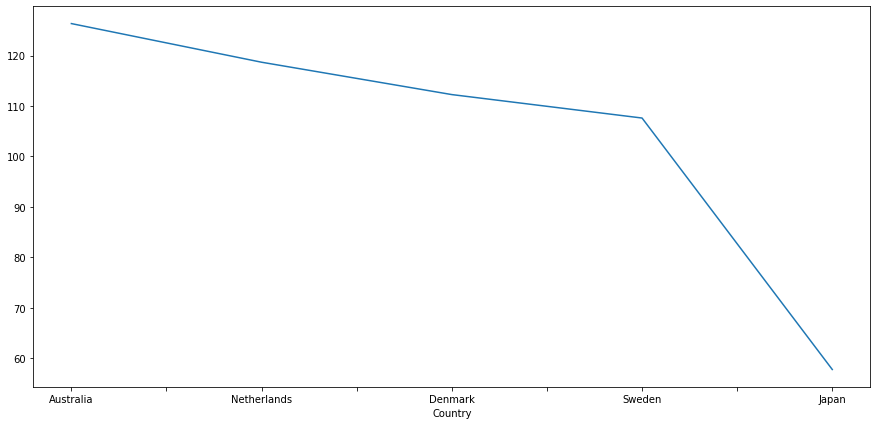

In [527]:
data_f['Spent'].groupby(data_f['Country']).agg('mean').sort_values(ascending = False).head(5).plot(figsize = (15, 7))

Evolution mensuelle du :
-     Montant Médian d’un panier client pour chacun de ces cinq pays

<AxesSubplot:xlabel='Country'>

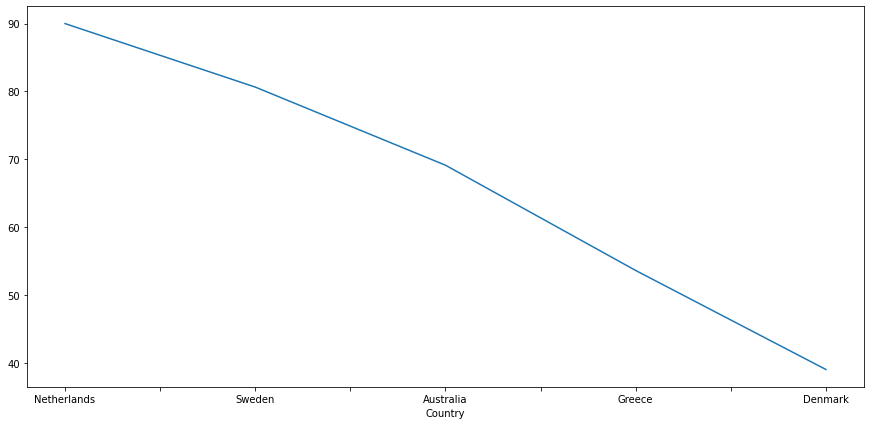

In [528]:
data_f['Spent'].groupby(data_f['Country']).agg('median').sort_values(ascending = False).head(5).plot(figsize = (15, 7))


## Question 6 : Fréquence

-     fréquence des 100 plus gros clients du Royaume.Uni

In [529]:
data_freq = data_f.copy()

In [530]:
data_freq.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313.0,United Kingdom,19.5,2011,1,4
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313.0,United Kingdom,10.5,2011,1,4
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313.0,United Kingdom,12.5,2011,1,4


In [531]:
data_reference = data_freq.InvoiceDate.max()
data_reference = data_reference + datetime.timedelta(days = 1)
data_reference

Timestamp('2011-04-01 00:00:00')

In [532]:
data_freq['days_since_last_spend'] = data_reference - data_freq.InvoiceDate

In [533]:
data_freq.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day,days_since_last_spend
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313.0,United Kingdom,19.5,2011,1,4,87 days
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4,87 days
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4,87 days
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313.0,United Kingdom,10.5,2011,1,4,87 days
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313.0,United Kingdom,12.5,2011,1,4,87 days


In [534]:
print(data_freq.columns.values)

['InvoiceNo' 'StockCode' 'Description' 'Quantity' 'InvoiceDate'
 'UnitPrice' 'CustomerID' 'Country' 'Spent' 'Year' 'Month' 'Day'
 'days_since_last_spend']


In [535]:
data_freq['days_since_last_spend'] = data_reference - data_freq.InvoiceDate
data_freq['num_days_since_last_spend'] = data_freq['days_since_last_spend'].astype('timedelta64[D]')

In [536]:
data_freq.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day,days_since_last_spend,num_days_since_last_spend
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313.0,United Kingdom,19.5,2011,1,4,87 days,87.0
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4,87 days,87.0


In [537]:
value = data_freq[['CustomerID', 'Spent']].groupby("CustomerID").sum().reset_index()

In [538]:
value.head()

,CustomerID,Spent
0,12346.0,77183.60
1,12347.0,475.39
2,12348.0,227.44
3,12350.0,334.40
4,12352.0,1561.81


In [539]:
customer_frequency = data_freq[['CustomerID', 'Spent']].groupby("CustomerID").count().reset_index()

In [540]:
customer_frequency.head()

,CustomerID,Spent
0,12346.0,1
1,12347.0,29
2,12348.0,6
3,12350.0,17
4,12352.0,38


In [541]:
customer_frequency.rename(columns={'Spent':'frequency'},inplace=True)

In [542]:
customer_frequency.head()

,CustomerID,frequency
0,12346.0,1
1,12347.0,29
2,12348.0,6
3,12350.0,17
4,12352.0,38


In [543]:
customer_history = value.merge(customer_frequency, how='outer')

In [544]:
customer_history

,CustomerID,Spent,frequency
0,12346.0,77183.60,1
1,12347.0,475.39,29
2,12348.0,227.44,6
3,12350.0,334.40,17
4,12352.0,1561.81,38
...,...,...,...
1771,18260.0,1105.82,61
1772,18270.0,111.95,5
1773,18273.0,51.00,1
1774,18280.0,180.60,10


Fréquence. A quelle fréquence dépensent les 100 plus gros clients du Royaume-Uni ?

In [545]:
customer_history['Pays'] = data_freq.Country

In [546]:
customer_history.head()

,CustomerID,Spent,frequency,Pays
0,12346.0,77183.60,1,NaN
1,12347.0,475.39,29,NaN
2,12348.0,227.44,6,NaN
3,12350.0,334.40,17,NaN
4,12352.0,1561.81,38,NaN


In [547]:
united_kingdom = customer_history[customer_history['Pays'] == 'United Kingdom'].sort_values(by=['Spent'], ascending=False)
united_kingdom

,CustomerID,Spent,frequency,Pays


In [548]:
united_kingdom = united_kingdom.head(100)
united_kingdom

,CustomerID,Spent,frequency,Pays


In [549]:
frequence_spent = united_kingdom.frequency.mean()

In [550]:
frequence_spent

nan

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## II. Modèles

-     Partie I : Question

-     A.Quel sera le chiffre d’affaire global de la société en Décembre 2011 ?

In [551]:
data_f.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313.0,United Kingdom,19.5,2011,1,4
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313.0,United Kingdom,10.5,2011,1,4
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313.0,United Kingdom,12.5,2011,1,4


In [552]:
mask_1 = (data_f['Year']==2011)
mask_1 = data_f[mask_1] 

In [553]:
mask_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313.0,United Kingdom,19.5,2011,1,4
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313.0,United Kingdom,10.5,2011,1,4
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313.0,United Kingdom,12.5,2011,1,4


In [554]:
mask_2 = (mask_1[mask_1['Month'] == 12 ])

In [555]:
mask_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day


In [556]:
mask_2.groupby(['Country']).agg({'Spent':'median'}).reset_index()

,Country,Spent


In [557]:
dt_France = mask_2[mask_2['Country'] == 'France']
dt_France.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day


In [558]:
dt_France.Country.unique()

array([], dtype=object)

In [559]:
Chiffre_Affaire = dt_France.Spent.sum()

In [560]:
Chiffre_Affaire

0.0

In [561]:
print("le chiffre d’affaire global de la société en Décembre 2011 est de {} €".format(Chiffre_Affaire.round(2)))

le chiffre d’affaire global de la société en Décembre 2011 est de 0.0 €


-     B.Combien de clients vont réaliser au moins un achat en Décembre 2011 en France ?

In [562]:
data_f.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313.0,United Kingdom,19.5,2011,1,4
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313.0,United Kingdom,10.5,2011,1,4
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313.0,United Kingdom,12.5,2011,1,4


In [563]:
mask_3 = (data_f['Year']==2011)
mask_3 = data_f[mask_3]

In [564]:
mask_3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313.0,United Kingdom,19.5,2011,1,4
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313.0,United Kingdom,10.5,2011,1,4
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313.0,United Kingdom,12.5,2011,1,4


In [565]:
mask_4 = (mask_3[mask_3['Month'] == 12 ])

In [566]:
mask_4.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day


In [567]:
data_achat = mask_4.copy()
data_achat.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day


In [568]:
dt_France_2 = data_achat[data_achat['Country'] == 'France']

In [569]:
dt_France_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day


In [570]:
Au_moins_1_Achat = dt_France_2.groupby(['Country','CustomerID']).agg({'InvoiceNo' : 'count'}).reset_index()

In [571]:
Au_moins_1_Achat.head()

,Country,CustomerID,InvoiceNo


In [572]:
Au_moins_1_Achat.InvoiceNo.filter('1')

Series([], Name: InvoiceNo, dtype: int64)

In [573]:
Au_moins_1_Achat

,Country,CustomerID,InvoiceNo


-     Partie II : Modèle

In [585]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [575]:
model_donnée = data_f.copy()

In [576]:
model_donnée.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Spent,Year,Month,Day
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313.0,United Kingdom,19.5,2011,1,4
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,10.5,2011,1,4
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313.0,United Kingdom,10.5,2011,1,4
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313.0,United Kingdom,12.5,2011,1,4


In [577]:
data_spent = model_donnée.groupby(['Year', 'Month', 'Day']).agg({'Spent':'sum'}).reset_index()

In [578]:
data_spent

,Year,Month,Day,Spent
0,2011,1,4,12125.46
1,2011,1,5,28803.63
2,2011,1,6,34360.19
3,2011,1,7,23797.79
4,2011,1,9,15778.20
...,...,...,...,...
70,2011,3,27,9224.40
71,2011,3,28,20005.16
72,2011,3,29,37190.52
73,2011,3,30,29587.42


In [579]:
x = data_spent[['Year', 'Month', 'Day']]
y = data_spent['Spent']

In [580]:
x.head()

,Year,Month,Day
0,2011,1,4
1,2011,1,5
2,2011,1,6
3,2011,1,7
4,2011,1,9


In [581]:
y.head()

0    12125.46
1    28803.63
2    34360.19
3    23797.79
4    15778.20
Name: Spent, dtype: float64

In [586]:
model  = RandomForestRegressor()

In [587]:
rf = model.fit(x, y)

In [590]:
day_list =[ i for i in range(10,32)]

In [591]:
day_list.append(3)

In [592]:
december_day = pd.DataFrame.from_dict({'Year': [2011 for i in range(len(day_list))], 'Month': [12 for i in range(len(day_list))], 'Day' : day_list })

In [593]:
december_day

,Year,Month,Day
0,2011,12,10
1,2011,12,11
2,2011,12,12
3,2011,12,13
4,2011,12,14
5,2011,12,15
6,2011,12,16
7,2011,12,17
8,2011,12,18
9,2011,12,19


In [594]:
data_december = december_day.copy(deep=True)

In [595]:
data_december.head()

,Year,Month,Day
0,2011,12,10
1,2011,12,11
2,2011,12,12
3,2011,12,13
4,2011,12,14


In [596]:
data_december.tail()

,Year,Month,Day
18,2011,12,28
19,2011,12,29
20,2011,12,30
21,2011,12,31
22,2011,12,3


In [598]:
data_december['Spent'] = rf.predict(december_day)

In [599]:
data_december.head()

,Year,Month,Day,Spent
0,2011,12,10,22305.8975
1,2011,12,11,23137.4580
2,2011,12,12,19646.0898
3,2011,12,13,9972.1571
4,2011,12,14,21668.7978


In [604]:
data_spent

,Year,Month,Day,Spent
0,2011,1,4,12125.46
1,2011,1,5,28803.63
2,2011,1,6,34360.19
3,2011,1,7,23797.79
4,2011,1,9,15778.20
...,...,...,...,...
70,2011,3,27,9224.40
71,2011,3,28,20005.16
72,2011,3,29,37190.52
73,2011,3,30,29587.42


In [ ]:
[['Year', 'Month', 'Day', 'Spent']]  & (data_spent['Month'==12])]

In [605]:
model_donnée_december = data_spent[(data_spent['Year']==2011) & (data_spent['Month']==12)][['Year', 'Month', 'Day', 'Spent']]

In [606]:
data_december = pd.concat([model_donnée_december, data_december], ignore_index=True)

In [607]:
data_december.sort_values('Day')

,Year,Month,Day,Spent
22,2011,12,3,27200.6958
0,2011,12,10,22305.8975
1,2011,12,11,23137.4580
2,2011,12,12,19646.0898
3,2011,12,13,9972.1571
4,2011,12,14,21668.7978
5,2011,12,15,20473.3956
6,2011,12,16,21342.0875
7,2011,12,17,27723.6666
8,2011,12,18,26288.0403


Recupération donnée 

In [613]:
data_f_predict = model_donnée[(model_donnée['Year']==2011) & (model_donnée['Month']==12)][['Year', 'Month', 'Day', 'Spent']]


-------------------------------------------------------------------------------------------------------------------------------------------------

################################################################################################################################################"

-------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
data_f.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,1,20.34


In [ ]:
data_model =data_f.copy()

In [ ]:
data_model.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,1,20.34


In [ ]:
data_model.InvoiceNo

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 406829, dtype: object

In [ ]:
data_model['Annulation'] = data_model['InvoiceNo'].str.extract('(\w)')

In [ ]:
data_model['Annulation'].value_counts(dropna = False)

NaN    397924
C        8905
Name: Annulation, dtype: int64

In [ ]:
data_model['Annulation'] = data_model['Annulation'].map({'5':1,  'C':-1})

In [ ]:
data_model.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Spent,Annulation,Cancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010,12,1,15.30,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,1,20.34,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010,12,1,22.00,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,1,20.34,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,1,20.34,NaN,NaN


In [ ]:
data_model.groupby('CustomerID').min()['Day']

C:\Users\bpong\AppData\Local\Temp\ipykernel_12776\2035062929.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  data_model.groupby('CustomerID').min()['Day']


CustomerID
12346.0    18
12347.0     2
12348.0     5
12349.0    21
12350.0     2
           ..
18280.0     7
18281.0    12
18282.0     2
18283.0     5
18287.0    12
Name: Day, Length: 4372, dtype: int64

In [ ]:
data_model.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,1,20.34


In [ ]:
data_model = data_model.groupby('CustomerID').agg({'Spent' : 'sum', 'Day' : 'min', 'Annulation' : 'sum'}).rename(columns={'Annulation' :'Freq_Annul'}).reset_index()

In [ ]:
data_model

,CustomerID,Spent,Day,Freq_Annul


C:\Users\bpong\AppData\Local\Temp\ipykernel_12776\3897633819.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_model['Day'])
c:\Users\bpong\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\Users\bpong\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\bpong\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in tr

<AxesSubplot:xlabel='Freq_Annul'>

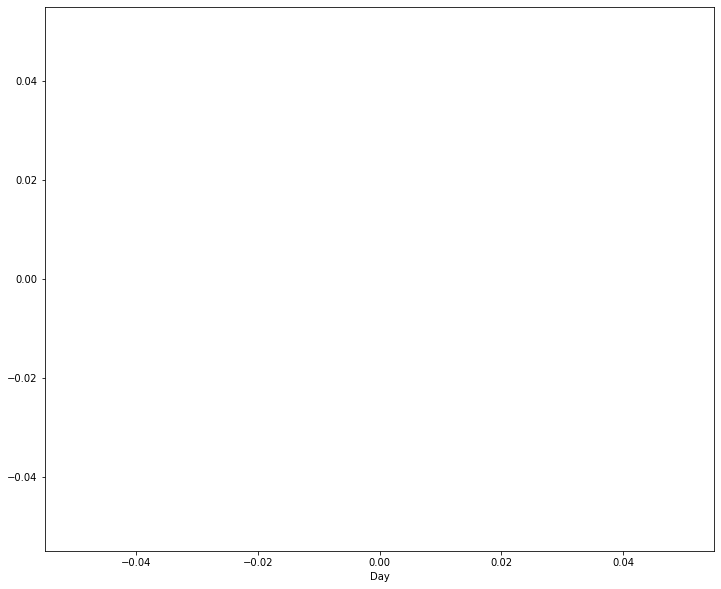

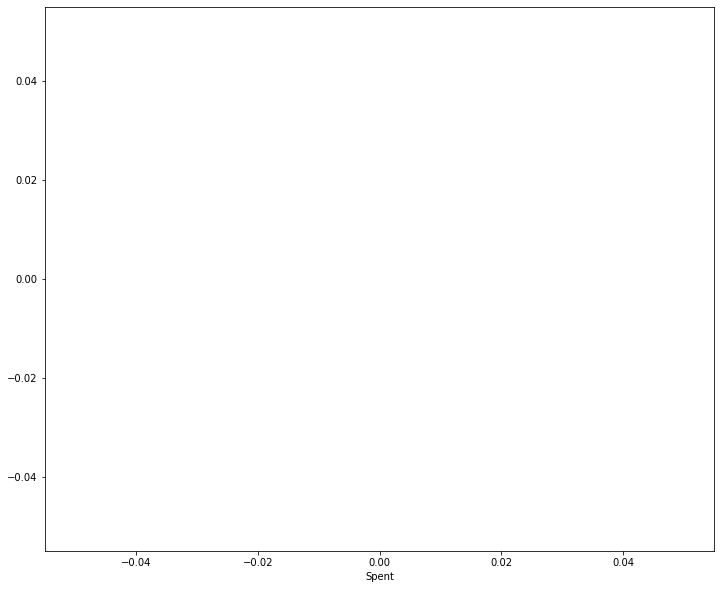

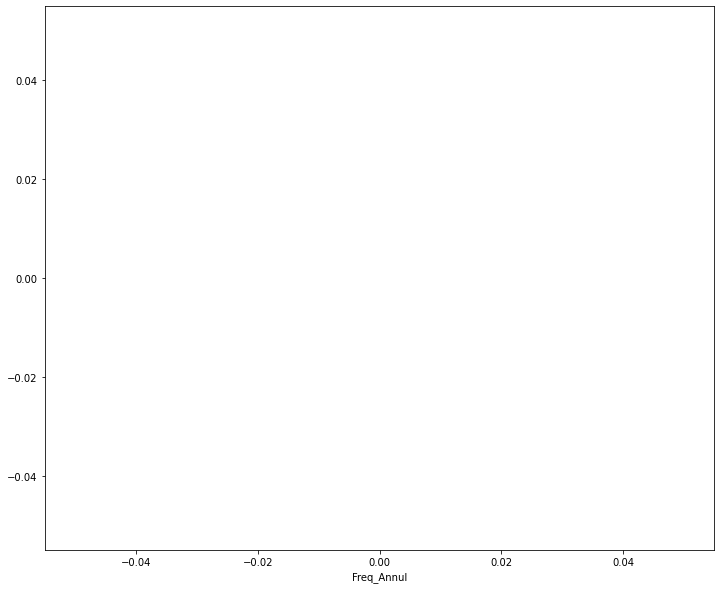

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(data_model['Day'])
plt.figure(figsize=(12,10))
sns.distplot(data_model['Spent'])
plt.figure(figsize=(12,10))
sns.distplot(data_model['Freq_Annul'])

On récupère et on transforme toute les DataFrame pour avoir que des valeurs positives

In [ ]:
data_model = data_model[(data_model > 0).all(1)]

In [ ]:
data_model.head()

,CustomerID,Spent,Day,Annulation


In [ ]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  0 non-null      float64
 1   Spent       0 non-null      float64
 2   Day         0 non-null      int64  
 3   Annulation  0 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 0.0 bytes


## Applying K-Means Clustering

In [ ]:
data_model.head()

,CustomerID,Spent,Day,Freq_Annul


In [ ]:
data_model.corr()

,CustomerID,Spent,Day,Freq_Annul
CustomerID,NaN,NaN,NaN,NaN
Spent,NaN,NaN,NaN,NaN
Day,NaN,NaN,NaN,NaN
Freq_Annul,NaN,NaN,NaN,NaN


c:\Users\bpong\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\bpong\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

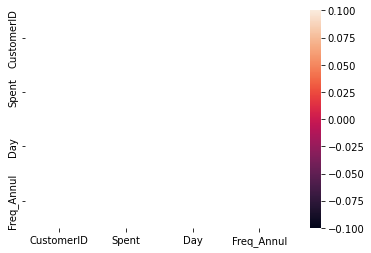

In [ ]:
sns.heatmap(data_model.corr(), annot = True)

In [ ]:
data_model_log = (np.log(data_model))

In [ ]:
data_model_log

,CustomerID,Spent,Day,Freq_Annul
